In [1]:
from UTILITY_quickstart import *

In [2]:
tao = initializeTao(
    inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
    defaultsFile = "setLattice_defaults_2024-08-21_demo.yml",
    numMacroParticles = 1e3,
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
Number of macro particles = 1000.0


In [3]:
phaseArr = []
timeArr = []
energyArr = []

for phaseSet in np.arange(-45, -35, 2):
    setLinacPhase(tao, "L2", phaseSet)
    trackBeam(tao)

    P = getBeamAtElement(tao, "PENT")
    
    phaseArr.append(phaseSet)
    timeArr.append(P["mean_t"])
    energyArr.append(P["mean_energy"])

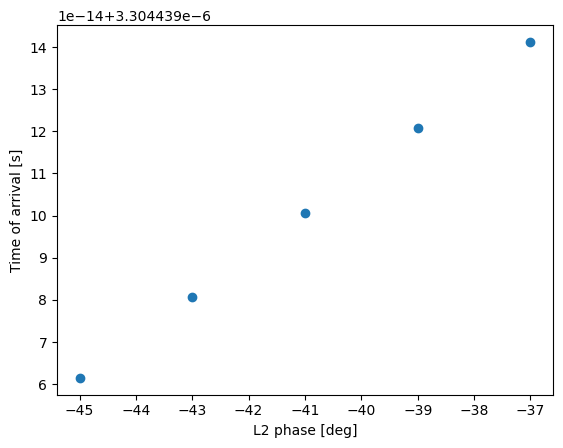

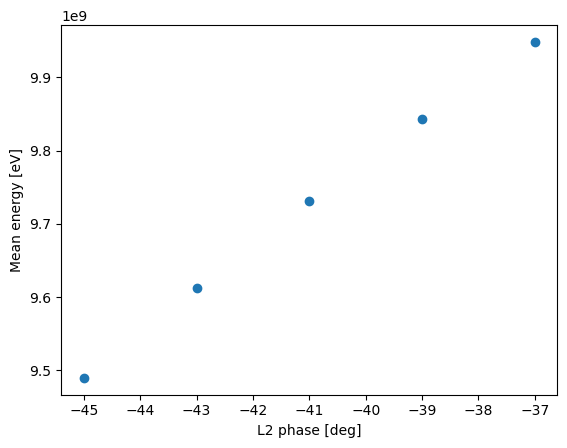

In [4]:
plt.plot(phaseArr, timeArr, 'o')
plt.xlabel('L2 phase [deg]')
plt.ylabel('Time of arrival [s]')
plt.show()

plt.plot(phaseArr, energyArr, 'o')
plt.xlabel('L2 phase [deg]')
plt.ylabel('Mean energy [eV]')
plt.show()

In [5]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.stats import linregress
import matplotlib.pyplot as plt

slope, intercept, r_value, p_value, std_err = linregress(phaseArr, timeArr)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


Slope: 9.98510496189747e-15
Intercept: 3.3044395103322466e-06
